In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df=pd.read_csv('C:/Users/carme/OneDrive/Documentos/Semestre 1/Base_limpia_SpotifyDataset.csv')
df

,nombre_de_usuario,genero,edad,pais,tipo_de_subscripcion,tiempo_de_escucha,canciones_escuchadas_por_dia,omision,tipo_de_dispositivo,anuncios_escuchados_por_semana,escucha_sin_conexion,cancelado
0,1,masculino,54,canada,gratis,26,23,0.34,computador,31,0,1
1,2,otro,33,alemania,pago,141,62,0.34,web,0,1,0
2,3,masculino,38,australia,pago,199,38,0.04,celular,0,1,1
3,4,femenino,38,canada,estudiante,36,2,0.31,celular,0,1,0
4,5,otro,29,estados unidos,familiar,250,57,0.36,celular,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7940,4062,femenino,49,francia,familiar,195,39,0.52,web,0,1,1
7941,6500,femenino,38,pakistan,estudiante,245,10,0.5,web,0,1,0
7942,5797,femenino,37,alemania,pago,116,29,0.58,computador,0,1,0
7943,5266,masculino,30,estados unidos,pago,185,36,0.15,web,0,1,1


## 1.- DESCRIPCION GENERAL DE LOS DATOS

Vision general 

In [78]:
df.shape


(7945, 12)

Tipo de datos

In [79]:
df.dtypes

nombre_de_usuario                  int64
genero                            object
edad                               int64
pais                              object
tipo_de_subscripcion              object
tiempo_de_escucha                  int64
canciones_escuchadas_por_dia       int64
omision                           object
tipo_de_dispositivo               object
anuncios_escuchados_por_semana     int64
escucha_sin_conexion               int64
cancelado                          int64
dtype: object

Me di cuenta de que la variable 'omision' tenia valores auto#

In [80]:
col = 'omision' 

df[col] = pd.to_numeric(df[col], errors='coerce')

media_val = df[col].mean()

df[col] = df[col].fillna(media_val)


Se cambia la el tipo de variable para que sea compatible a las graficas 

In [81]:
df['omision'].astype(float)

0       0.34
1       0.34
2       0.04
3       0.31
4       0.36
        ... 
7940    0.52
7941    0.50
7942    0.58
7943    0.15
7944    0.15
Name: omision, Length: 7945, dtype: float64

Resumen estadistico:
Mostrando media, mediana, desviación estándar, valores mínimos y máximos

In [82]:
num_colums = df.select_dtypes(include=['number']).columns
for n in num_colums:
    print(f"la columna {n} tiene de datos:")
    print(df[n].describe())
    print()

la columna nombre_de_usuario tiene de datos:
count    7945.000000
mean     4004.489239
std      2311.698152
min         1.000000
25%      2000.000000
50%      4002.000000
75%      6015.000000
max      8000.000000
Name: nombre_de_usuario, dtype: float64

la columna edad tiene de datos:
count    7945.000000
mean       37.671743
std        12.423816
min        16.000000
25%        27.000000
50%        38.000000
75%        48.000000
max        59.000000
Name: edad, dtype: float64

la columna tiempo_de_escucha tiene de datos:
count    7945.000000
mean      154.176715
std        81.808426
min        10.000000
25%        85.000000
50%       154.000000
75%       223.000000
max       299.000000
Name: tiempo_de_escucha, dtype: float64

la columna canciones_escuchadas_por_dia tiene de datos:
count    7945.000000
mean       50.223159
std        27.991712
min         1.000000
25%        26.000000
50%        50.000000
75%        74.000000
max        99.000000
Name: canciones_escuchadas_por_dia, dtyp

Resumen estadistico: 
Mostrando la frecuencia de cada categoría.

In [83]:
vcat_columns = [
    "genero",
    "pais",
    "tipo_de_subscripcion",
    "tipo_de_dispositivo"
]
for n in vcat_columns:
    print(f"la columna {n} tiene de datos:")
    print(df[n].value_counts())
    print()

la columna genero tiene de datos:
genero
masculino    2833
otro         2558
femenino     2554
Name: count, dtype: int64

la columna pais tiene de datos:
pais
australia         1245
estados unidos     987
alemania           975
india              973
pakistan           973
francia            944
reino unido        928
canada             920
Name: count, dtype: int64

la columna tipo_de_subscripcion tiene de datos:
tipo_de_subscripcion
pago          2323
gratis        1919
estudiante    1867
familiar      1836
Name: count, dtype: int64

la columna tipo_de_dispositivo tiene de datos:
tipo_de_dispositivo
computador    2929
web           2527
celular       2489
Name: count, dtype: int64



## 2. VISUALIZACION Y DISTRIBUCION DE VARIABLES INDIVIDUALES

Graficas variables numericas

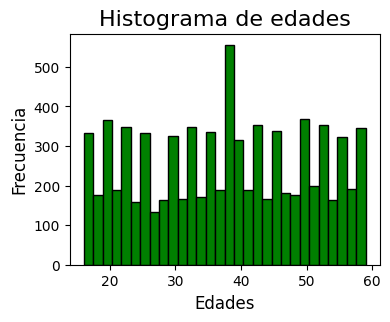

In [84]:
plt.figure(figsize=(4, 3))
plt.hist(df['edad'], bins=30, color='green', edgecolor='black'); 
plt.title('Histograma de edades', fontsize=16) 
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.show()

Se puede ver que hay gran presencia de los usuarion con mas de 35 años y menos de 42

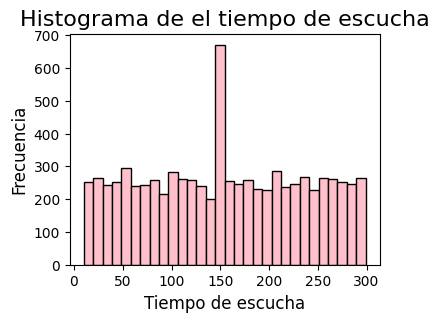

In [85]:
plt.figure(figsize=(4, 3))
plt.hist(df['tiempo_de_escucha'], bins=30, color='pink', edgecolor='black');  
plt.title('Histograma de el tiempo de escucha', fontsize=16)  
plt.xlabel('Tiempo de escucha', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12) 

plt.show()

La mayoria se encuentra entre el 200 y 300 de frecuencia a excepcion del pico de 150 que llega casi a los 700

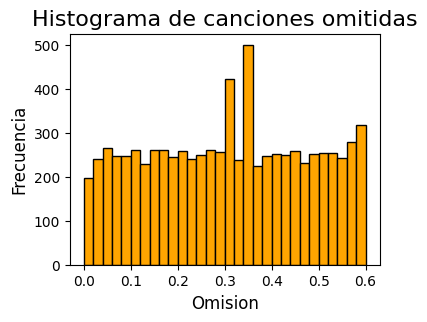

In [86]:
plt.figure(figsize=(4, 3))
plt.hist(df['omision'], bins=30, color='orange', edgecolor='black');  
plt.title('Histograma de canciones omitidas', fontsize=16)  
plt.xlabel('Omision', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

Los dos picos cercanos indican que los oyentes tardan un período breve y específico para decidir si les gusta la pista o no. Este período es crucial para el "gancho" o la melodía principal.

Graficas variables categoricas

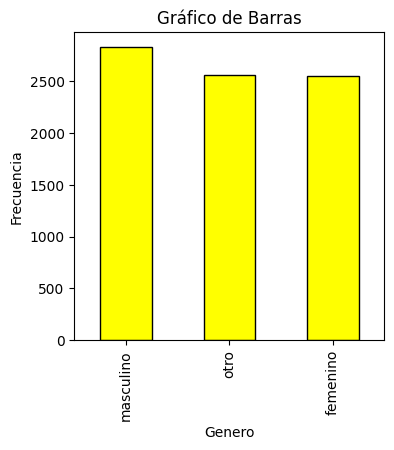

In [87]:
plt.figure(figsize=(4, 4)) 
df['genero'].value_counts().plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Gráfico de Barras')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

plt.show()

Podemos observar que la mayoria de los usuarios son hombres

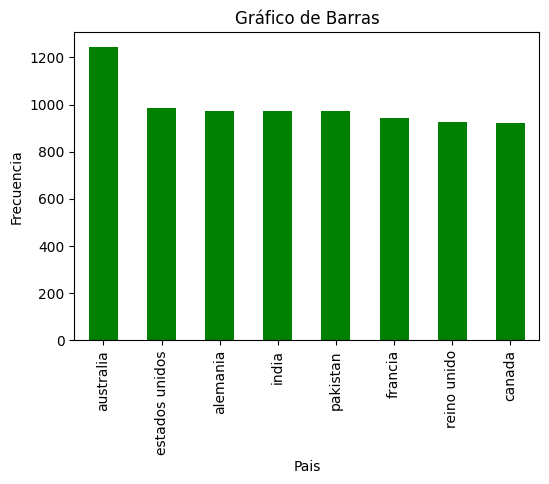

In [88]:
plt.figure(figsize=(6, 4)) 
df['pais'].value_counts().plot(kind='bar', color='green')
plt.title('Gráfico de Barras')
plt.xlabel('Pais')
plt.ylabel('Frecuencia')

plt.show()

La mayoria de los usuarios son de Australia

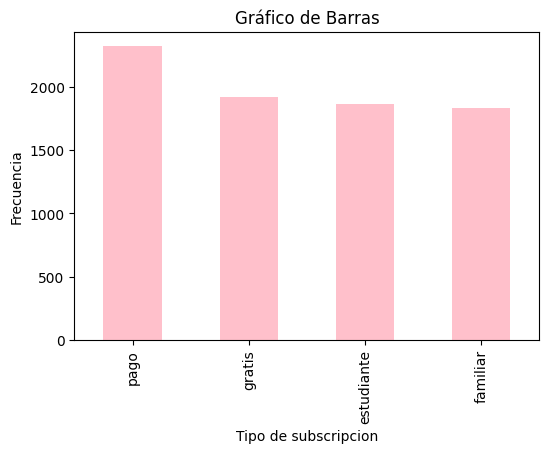

In [89]:
plt.figure(figsize=(6, 4)) 
df['tipo_de_subscripcion'].value_counts().plot(kind='bar', color='pink')
plt.title('Gráfico de Barras')
plt.xlabel('Tipo de subscripcion')
plt.ylabel('Frecuencia')

plt.show()

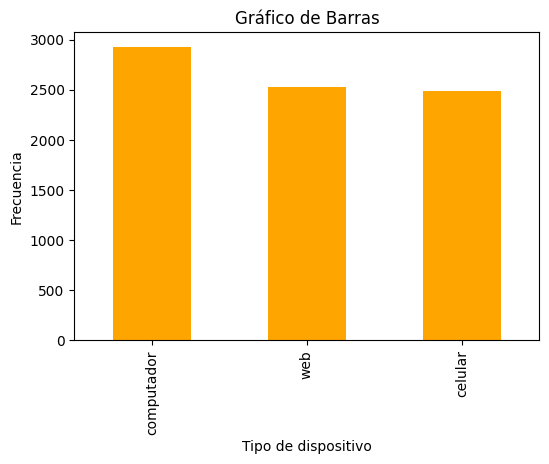

In [90]:
plt.figure(figsize=(6, 4)) 
df['tipo_de_dispositivo'].value_counts().plot(kind='bar', color='orange')
plt.title('Gráfico de Barras')
plt.xlabel('Tipo de dispositivo')
plt.ylabel('Frecuencia')

plt.show()

## 3. CORRELACION ENTRE VARIABLES

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nombre_de_usuario               7945 non-null   int64  
 1   genero                          7945 non-null   object 
 2   edad                            7945 non-null   int64  
 3   pais                            7945 non-null   object 
 4   tipo_de_subscripcion            7945 non-null   object 
 5   tiempo_de_escucha               7945 non-null   int64  
 6   canciones_escuchadas_por_dia    7945 non-null   int64  
 7   omision                         7945 non-null   float64
 8   tipo_de_dispositivo             7945 non-null   object 
 9   anuncios_escuchados_por_semana  7945 non-null   int64  
 10  escucha_sin_conexion            7945 non-null   int64  
 11  cancelado                       7945 non-null   int64  
dtypes: float64(1), int64(7), object(4)

Matriz de correlacion

In [92]:
df_numeric = df[['edad', 'tiempo_de_escucha', 'canciones_escuchadas_por_dia', 'omision', 'anuncios_escuchados_por_semana', 'escucha_sin_conexion', 
                 'cancelado']]

correlation_matrix = df_numeric.corr()
correlation_matrix

,edad,tiempo_de_escucha,canciones_escuchadas_por_dia,omision,anuncios_escuchados_por_semana,escucha_sin_conexion,cancelado
edad,1.000000,-0.017165,-0.009185,-0.021421,-0.012513,0.020762,0.005458
tiempo_de_escucha,-0.017165,1.000000,-0.009131,-0.020676,-0.000129,-0.003278,-0.011528
canciones_escuchadas_por_dia,-0.009185,-0.009131,1.000000,-0.008761,-0.011529,0.016223,0.008012
omision,-0.021421,-0.020676,-0.008761,1.000000,-0.013014,-0.002748,0.014043
anuncios_escuchados_por_semana,-0.012513,-0.000129,-0.011529,-0.013014,1.000000,-0.816557,-0.003005
escucha_sin_conexion,0.020762,-0.003278,0.016223,-0.002748,-0.816557,1.000000,0.014994
cancelado,0.005458,-0.011528,0.008012,0.014043,-0.003005,0.014994,1.000000


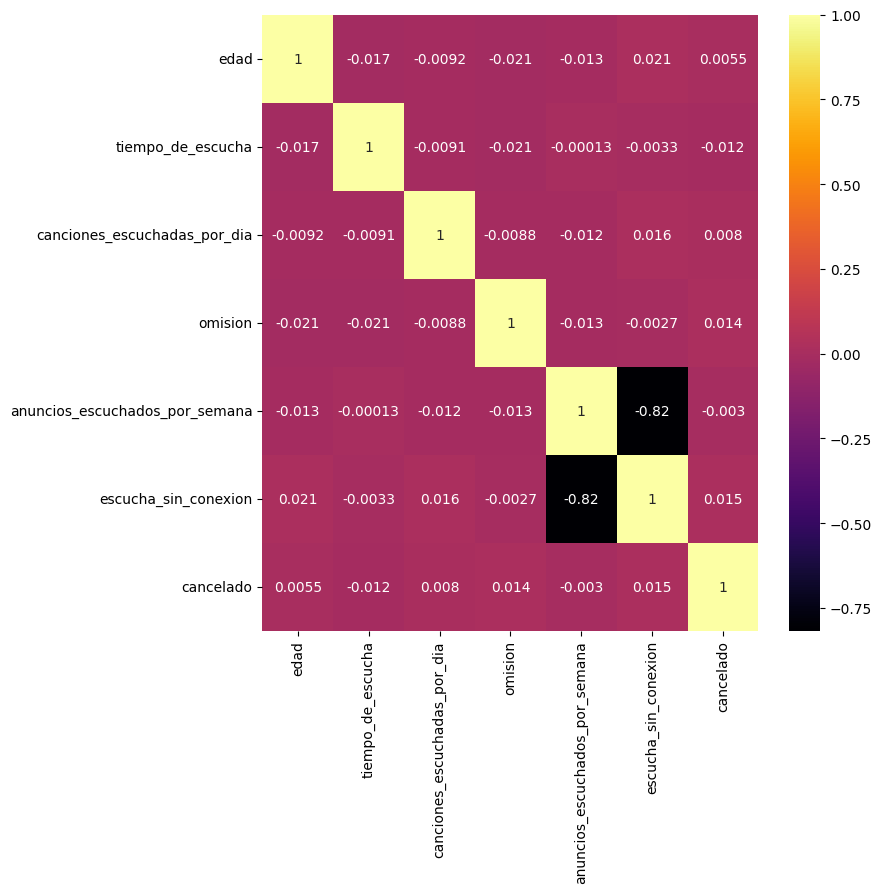

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.show()

La matriz de correlacion muestra que la variable 'cancelado' casi no se relaciona con las demas variables numericas, es decir no hay una conexion fuerte que explique por si sola por que un usuario abandona la plataforma 

Pareja de variables

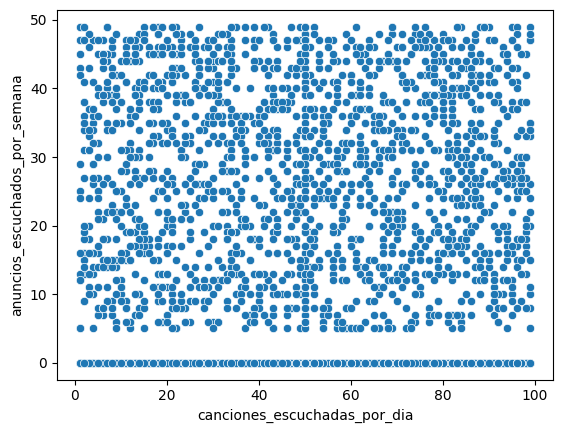

In [94]:
sns.scatterplot(x='canciones_escuchadas_por_dia',y='anuncios_escuchados_por_semana',data=df)
plt.show()


Al parecer no hay ningun tipo de relacion entre las canciones escuchadas por dia y los anuncios ya que la grafica no muestra ningun patron o tendencia relacionada 

## 4.- ANÁLISIS DE VALORES ATÍPICOS 

In [95]:
fig = px.box(df, y='canciones_escuchadas_por_dia', title='Detección de datos atípicos')
fig.update_layout(width=300,height=500) 
fig.show()

En la grafica no hay usuarios que escuchen una cantidad extremadamente baja o extremadamente alta de canciones al día, más allá de los límites del rango

In [96]:
iqr = df['canciones_escuchadas_por_dia'].quantile(0.75) - df['canciones_escuchadas_por_dia'].quantile(0.25)

filtro_inferior = df['canciones_escuchadas_por_dia'] > df['canciones_escuchadas_por_dia'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['canciones_escuchadas_por_dia'] < df['canciones_escuchadas_por_dia'].quantile(0.75) + (iqr * 1.3)

df_filtrado = df[filtro_inferior & filtro_superior]

fig = px.box(df_filtrado, y='canciones_escuchadas_por_dia', title='Datos atípicos eliminados')
fig.update_layout(width=300,height=500) 
fig.show()
 

No se detectaron ni se eliminaron valores atípicos, ya que este grafico es identico al original.

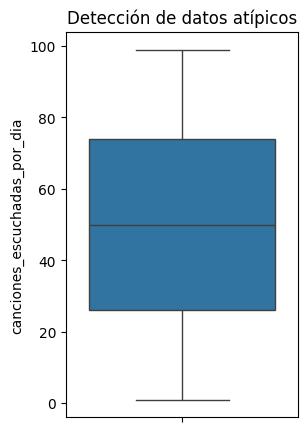

In [97]:
plt.figure(figsize=(3, 5)) 
sns.boxplot(y='canciones_escuchadas_por_dia', data=df_filtrado)

plt.title('Detección de datos atípicos')
plt.ylabel('canciones_escuchadas_por_dia')
plt.show()

## 5.- ANÁLISIS DE VALORES FALTANTES 

Porcentaje de datos faltantes

In [98]:
df.isna().sum()/len(df)*100

nombre_de_usuario                 0.0
genero                            0.0
edad                              0.0
pais                              0.0
tipo_de_subscripcion              0.0
tiempo_de_escucha                 0.0
canciones_escuchadas_por_dia      0.0
omision                           0.0
tipo_de_dispositivo               0.0
anuncios_escuchados_por_semana    0.0
escucha_sin_conexion              0.0
cancelado                         0.0
dtype: float64

Mapa de calor 

<Axes: >

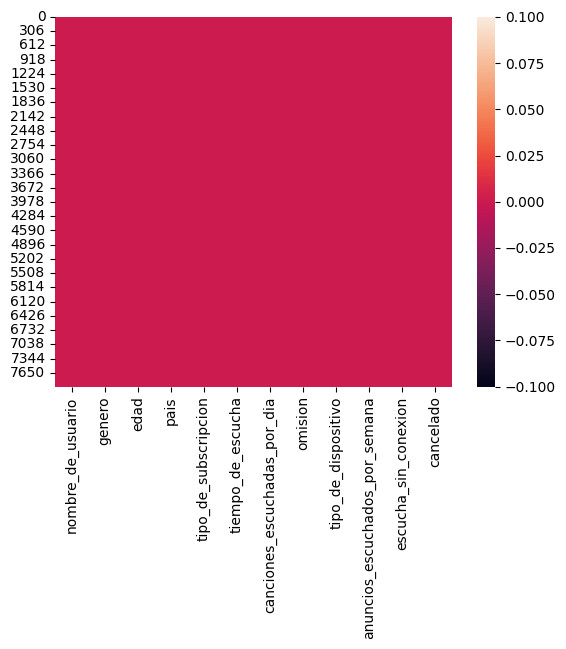

In [99]:
sns.heatmap(df.isnull())

## 6.- RELACION ENTRE VARIABES CATEGORICAS Y NUMERICAS

<Axes: xlabel='tipo_de_subscripcion', ylabel='tiempo_de_escucha'>

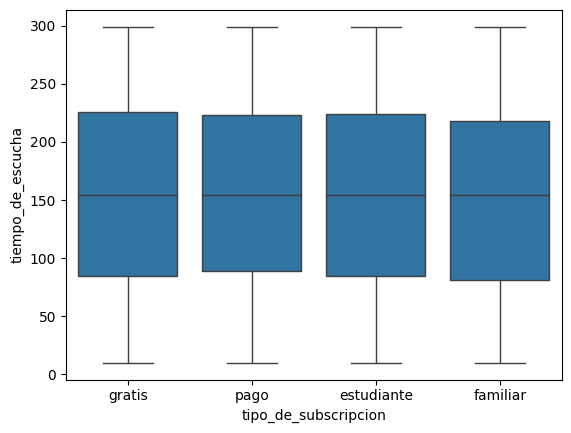

In [100]:
sns.boxplot(x='tipo_de_subscripcion', y='tiempo_de_escucha', data=df)

La modalidad de pago o el plan que utiliza no influye en la cantidad total de tiempo que dedica a escuchar.

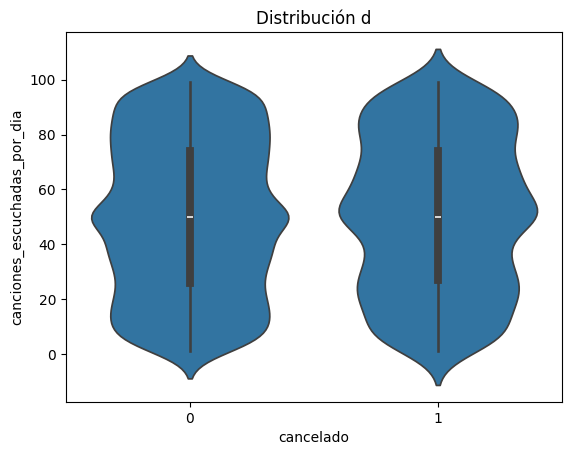

In [101]:
sns.violinplot(y='canciones_escuchadas_por_dia', x='cancelado', data=df)

plt.title('Distribución d')
plt.show()

La probabilidad de cancelación es la misma, es decir que las canciones escuchadas no son un factor

## MODELO DE MACHINE LEARNING

Identificar las variables influyentes.

Cancelado → si un usuario cancelará su suscripción.

Tiempo_de_escucha → cuántos minutos escucha al día.

Anuncios_escuchados_por_semana → intensidad del consumo.

Tipo_de_subscripcion → clasificación del usuario.

Se eligio el modelo de REGRESION LOGISTICA ya la variable objetivo de este porgrama es 'cancelado' y esta es una variables de 0 o 1 

c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy del modelo: 0.7575503355704698


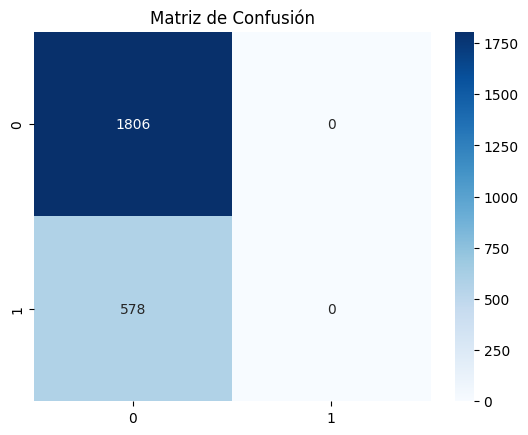

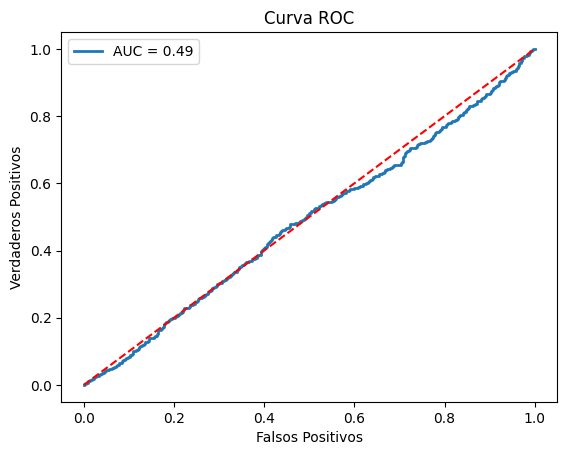

In [109]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

df_model = df.copy()

y = df_model['cancelado']
X = df_model.drop('cancelado', axis=1)

categorical_features = ['genero', 'pais', 'tipo_de_subscripcion', 'tipo_de_dispositivo']
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()
 

## IMPLEMENTACION Y ENTRENAMIENTO

a. División de datos 

In [103]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

b. Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train, y_train) 

c. Predicción: 

In [106]:
y_pred = model.predict(X_test) 

Calificacion

0.7526746381371932
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1196
           1       0.00      0.00      0.00       393

    accuracy                           0.75      1589
   macro avg       0.38      0.50      0.43      1589
weighted avg       0.57      0.75      0.65      1589



c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

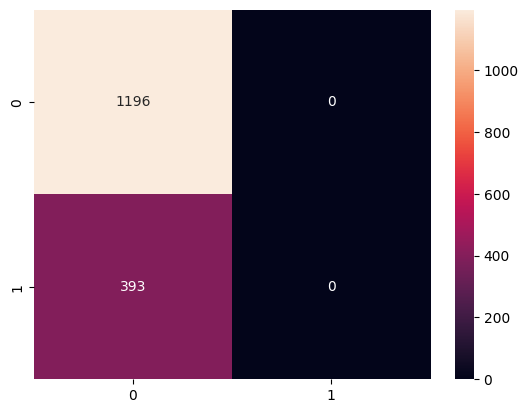

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
print(accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

El modelo de regresión logística alcanzó un 75% de accuracy y un F1-score de 0.86, lo que lo hace adecuado para la prediccion.

Text(0.5, 1.0, 'Predicciones vs Valores reales')

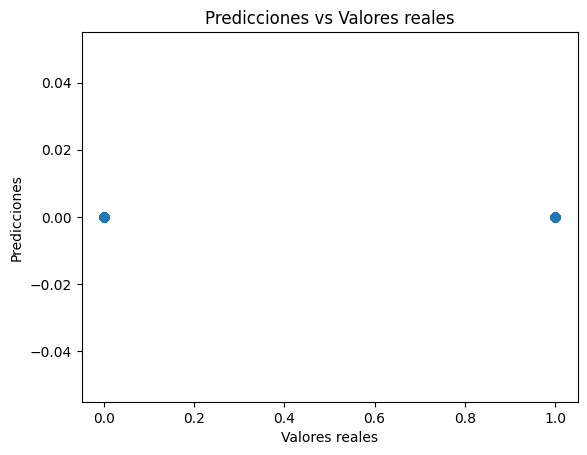

In [108]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Valores reales') 
plt.ylabel('Predicciones') 
plt.title('Predicciones vs Valores reales')